In [20]:
import gymnasium as gym
import random
import matplotlib.pyplot as plt

In [21]:
env = gym.make("Taxi-v3")

In [22]:
alpha, gamma, epsilon = 0.4, 0.9, 0.9
episodes = 2000

In [23]:
obsCount = env.observation_space.n
actCount = env.action_space.n

In [24]:
def epsilonGreedyPolicy(state):
    if random.random() < epsilon:
        action = random.randint(0, actCount-1)
    else:
        action = Q[state].index(max(Q[state]))
    return action

In [31]:
def SARSA():
    Q = [[0 for _ in range(actCount)] for _ in range(obsCount)]
    rewards = []
    for episode in range(episodes):
        state = env.reset()[0]
        action = epsilonGreedyPolicy(state)
        totalReward = 0
        
        while True:
            nextState, reward, done, end, _ = env.step(action)
            # 0-> nextState, 1-> reward, 2-> done
            nextAction = epsilonGreedyPolicy(nextState)
            Q[state][action] += alpha * (reward + gamma * Q[nextState][nextAction] - Q[state][action])
            totalReward += reward
            state, action = nextState, nextAction
            if done or end: break
                
        rewards.append(totalReward)
    return rewards

In [32]:
#SARSA -> Q updation is alpha *(reward + gamma * Q[nextS][nextA] - Q[s][a])

In [37]:
def qLearning():
    Q = [[0 for _ in range(actCount)] for _ in range(obsCount)]
    rewards = []
    for episode in range(episodes):
        state = env.reset()[0]
        totalReward = 0
        
        while True:
            action = epsilonGreedyPolicy(state)
            nextState, reward, done, end, _ = env.step(action)
            # 0-> nextState, 1-> reward, 2-> done
            nextAction = epsilonGreedyPolicy(nextState)
            Q[state][action] += alpha * (reward + gamma * Q[nextState].index(max(Q[nextState])) - Q[state][action])
            totalReward += reward
            state = nextState
            if done or end: break
                
        rewards.append(totalReward)
    return rewards

In [38]:
#qLearning -> Q updation is alpha * (reward + gamma * maxQ[nS] - Q[s][a])
#and randomly taking actions for each steps, no nextAction updation

In [41]:
def expectedSARSA():
    Q = [[0 for _ in range(actCount)] for _ in range(obsCount)]
    rewards = []
    for episode in range(episodes):
        state = env.reset()[0]
        totalReward = 0
        
        while True:
            action = epsilonGreedyPolicy(state)
            nextState, reward, done, end, _ = env.step(action)
            # 0-> nextState, 1-> reward, 2-> done
            expVal = sum(Q[nextState][action] * epsilon / len(Q[nextState]) for action in range(len(Q[nextState]))) + max(Q[nextState]) * (1 - epsilon)
            Q[state][action] += alpha * (reward + gamma * expVal - Q[state][action])
            totalReward += reward
            state = nextState
            if done or end: break
                
        rewards.append(totalReward)
    return rewards

In [52]:
rewards = [SARSA(), qLearning(), expectedSARSA()]
policies = ["SARSA", "qLearning", "expectedSARSA"]
#0->SARSA, 1->qLearning, 2->expectedSARSA

In [53]:
meanRewards = [sum(policy)/len(policy) for policy in rewards]

In [54]:
meanRewards

[-715.9045, -715.0695, -717.963]

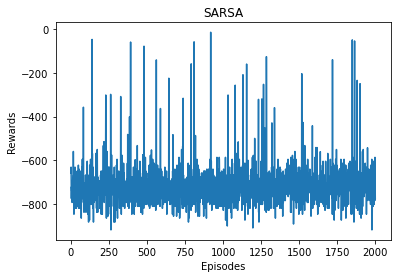

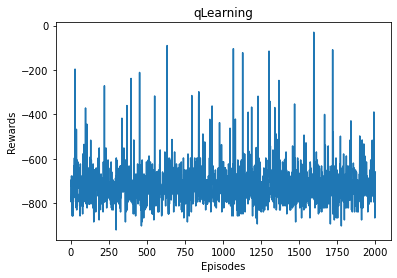

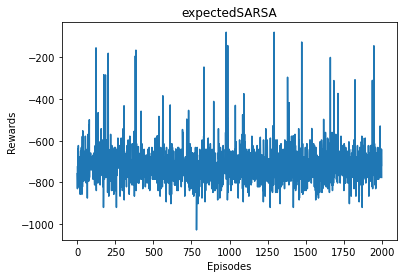

In [55]:
for i in range(3):
    plt.figure()
    plt.plot(rewards[i])
    plt.title(policies[i])
    plt.xlabel("Episodes")
    plt.ylabel("Rewards")
plt.show()